In [1]:
# Goal is to estimate/predict popularity
import os
import tarfile
import urllib

SPOTIFY_PATH = os.path.join("datasets", "spotify")

In [2]:
import pandas as pd

def load_spotify_data(spotify_path=SPOTIFY_PATH):
    csv_path = os.path.join(spotify_path, "alternative_music_data.csv")
    return pd.read_csv(csv_path)

In [3]:
spotify = load_spotify_data()
spotify.head()

,Artist Name,Track Name,Popularity,Genres,Playlist,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature
0,James,Laid,66,"['britpop', 'madchester', 'new wave', 'new wav...",Alternative 90s,0.457,0.909,0,-9.451,1,...,0.000276,0.1350,0.755,115.998,2CdS3DRqWR5LAhy4hM5X9W,spotify:track:2CdS3DRqWR5LAhy4hM5X9W,https://api.spotify.com/v1/tracks/2CdS3DRqWR5L...,https://api.spotify.com/v1/audio-analysis/2CdS...,156667,4
1,grandson,In Over My Head,60,"['modern alternative rock', 'modern rock', 'ro...",Alternative Beats,0.582,0.817,0,-6.475,1,...,0.015800,0.5750,0.622,155.124,3r0mb1tzAcCNoA8YRXuIhZ,spotify:track:3r0mb1tzAcCNoA8YRXuIhZ,https://api.spotify.com/v1/tracks/3r0mb1tzAcCN...,https://api.spotify.com/v1/audio-analysis/3r0m...,198366,4
2,Foals,On The Luna,51,"['alternative dance', 'indie rock', 'modern al...",Alternative 10s,0.525,0.976,0,-2.023,1,...,0.000392,0.0804,0.855,138.984,0Sfj5fPqZzCq9o3f1NNphz,spotify:track:0Sfj5fPqZzCq9o3f1NNphz,https://api.spotify.com/v1/tracks/0Sfj5fPqZzCq...,https://api.spotify.com/v1/audio-analysis/0Sfj...,192695,4
3,Longpigs,She Said,47,"['britpop', 'sheffield indie']",Alternative 90s,0.210,0.870,5,-5.985,1,...,0.000488,0.1880,0.517,168.352,5J7l2wE9wxqod7xIP0jyAB,spotify:track:5J7l2wE9wxqod7xIP0jyAB,https://api.spotify.com/v1/tracks/5J7l2wE9wxqo...,https://api.spotify.com/v1/audio-analysis/5J7l...,264067,4
4,Beastie Boys,Sure Shot,57,"['alternative rock', 'east coast hip hop', 'go...",Alternative 90s,0.692,0.799,1,-7.924,1,...,0.000000,0.3010,0.549,97.978,21REQ1bCUWphT2QK3bLWYQ,spotify:track:21REQ1bCUWphT2QK3bLWYQ,https://api.spotify.com/v1/tracks/21REQ1bCUWph...,https://api.spotify.com/v1/audio-analysis/21RE...,199667,4


In [4]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist Name       2160 non-null   object 
 1   Track Name        2160 non-null   object 
 2   Popularity        2160 non-null   int64  
 3   Genres            2160 non-null   object 
 4   Playlist          2160 non-null   object 
 5   danceability      2160 non-null   float64
 6   energy            2160 non-null   float64
 7   key               2160 non-null   int64  
 8   loudness          2160 non-null   float64
 9   mode              2160 non-null   int64  
 10  speechiness       2160 non-null   float64
 11  acousticness      2160 non-null   float64
 12  instrumentalness  2160 non-null   float64
 13  liveness          2160 non-null   float64
 14  valence           2160 non-null   float64
 15  tempo             2160 non-null   float64
 16  id                2160 non-null   object 


In [5]:
spotify["Genres"].value_counts()

[]                                                                                                                 258
['neo-psychedelic']                                                                                                 15
['modern alternative rock']                                                                                         12
['alternative rock', 'garage rock', 'modern rock', 'permanent wave', 'rock']                                        12
['alternative dance', 'dance-punk', 'indie rock', 'modern rock', 'new rave']                                        11
                                                                                                                  ... 
['folk-pop', 'shimmer pop']                                                                                          1
['indie anthem-folk', 'indie cafe pop', 'vapor soul']                                                                1
['alternative r&b', 'indie hip hop', 'indie r&b'

In [6]:
spotify.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000
mean,46.292593,0.536952,0.693046,5.355556,-7.623776,0.658796,0.067556,0.177995,0.164318,0.188587,0.513680,126.069160,223880.492130,3.939352
std,15.709455,0.157916,0.212345,3.569007,3.831861,0.474223,0.065370,0.263960,0.292144,0.141501,0.234666,29.027706,61890.074918,0.346394
min,0.000000,0.063500,0.003010,0.000000,-33.838000,0.000000,0.022700,0.000001,0.000000,0.013600,0.027100,58.500000,63214.000000,1.000000
25%,37.000000,0.434000,0.569000,2.000000,-9.070500,0.000000,0.034000,0.003150,0.000024,0.097000,0.347000,104.021000,185679.750000,4.000000
50%,46.000000,0.543500,0.726000,6.000000,-6.913500,1.000000,0.044500,0.034050,0.002240,0.131000,0.510000,125.024500,214471.000000,4.000000
75%,57.000000,0.644000,0.870250,9.000000,-5.213750,1.000000,0.070525,0.255750,0.157250,0.255000,0.695000,146.093750,251293.000000,4.000000
max,89.000000,0.982000,0.998000,11.000000,1.342000,1.000000,0.550000,0.996000,0.964000,0.956000,0.977000,217.416000,645000.000000,5.000000


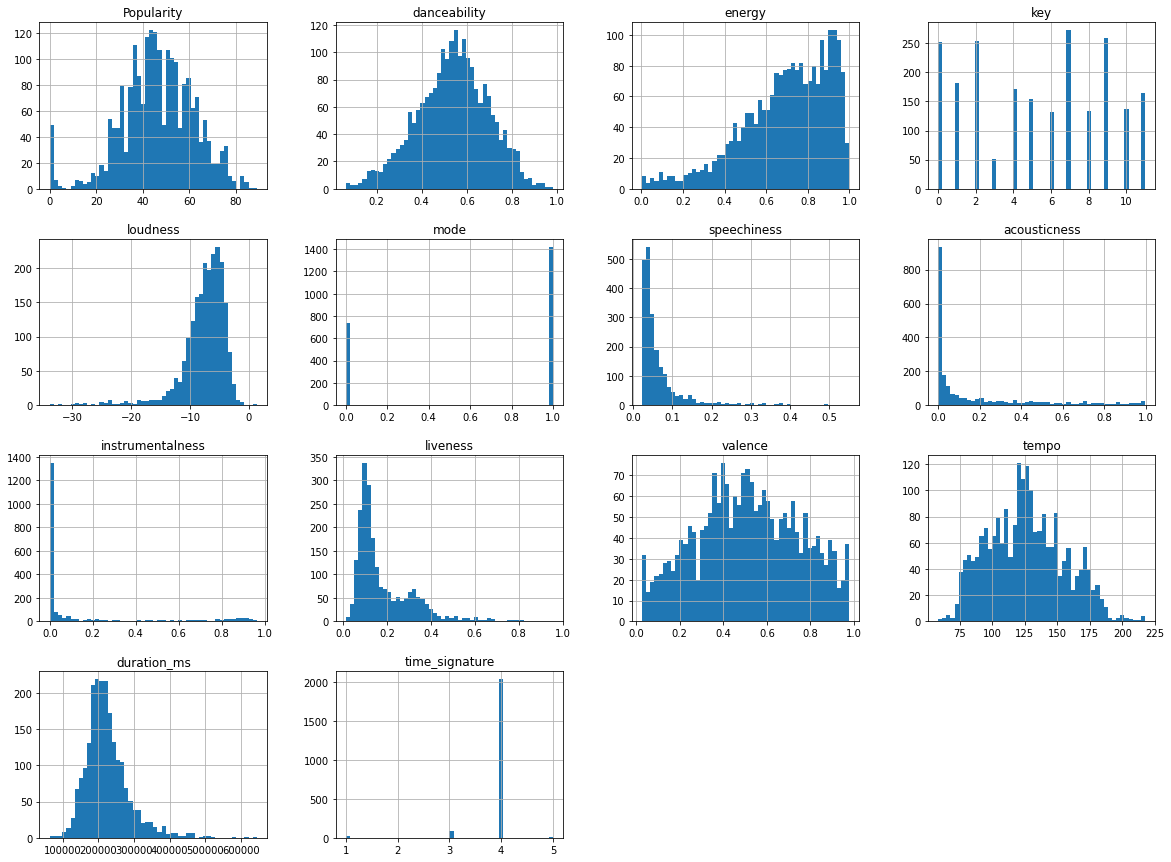

In [7]:
import matplotlib.pyplot as plt
spotify.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
# Testset creation
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(spotify, test_size=0.2, random_state=42)

In [9]:
# create a stratified testset based on the danciness (p.54 hands-on machine learning)
spotify["danceability_cat"] = pd.cut(spotify["danceability"],
                                bins=[0,0.2,0.4,0.6,0.8,1],
                                labels=[1,2,3,4,5,])

<AxesSubplot:>

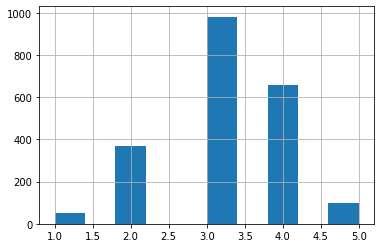

In [10]:
spotify["danceability_cat"].hist()

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(spotify, spotify["danceability_cat"]):
    strat_train_set = spotify.loc[train_index]
    strat_test_set = spotify.loc[test_index]

In [12]:
strat_test_set["danceability_cat"].value_counts() / len(strat_test_set)

3    0.453704
4    0.305556
2    0.171296
5    0.046296
1    0.023148
Name: danceability_cat, dtype: float64

In [13]:
# Bring data back into normal
for set_ in (strat_train_set, strat_test_set):
    set_.drop("danceability_cat", axis=1, inplace=True)

## Explore data

In [14]:
# loudness over energy maybe?
spotfy = strat_train_set.copy()

<AxesSubplot:xlabel='loudness', ylabel='energy'>

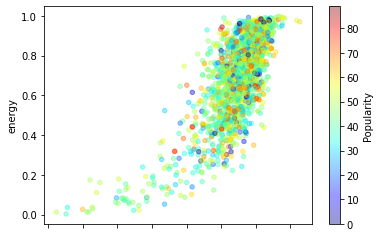

In [15]:
spotfy.plot(kind="scatter", x="loudness", y="energy", c="Popularity", cmap=plt.get_cmap("jet"), alpha=0.4)

In [16]:
# Looking for correlations
corr_matrix = spotify.corr()

In [17]:
corr_matrix["Popularity"].sort_values(ascending=False)

Popularity          1.000000
valence             0.096179
key                 0.069131
loudness            0.040924
energy              0.040618
mode                0.017075
time_signature      0.011519
danceability        0.003605
tempo               0.000683
liveness           -0.018912
duration_ms        -0.028710
acousticness       -0.046323
speechiness        -0.057818
instrumentalness   -0.116075
Name: Popularity, dtype: float64

array([[<AxesSubplot:xlabel='Popularity', ylabel='Popularity'>,
        <AxesSubplot:xlabel='instrumentalness', ylabel='Popularity'>],
       [<AxesSubplot:xlabel='Popularity', ylabel='instrumentalness'>,
        <AxesSubplot:xlabel='instrumentalness', ylabel='instrumentalness'>]],
      dtype=object)

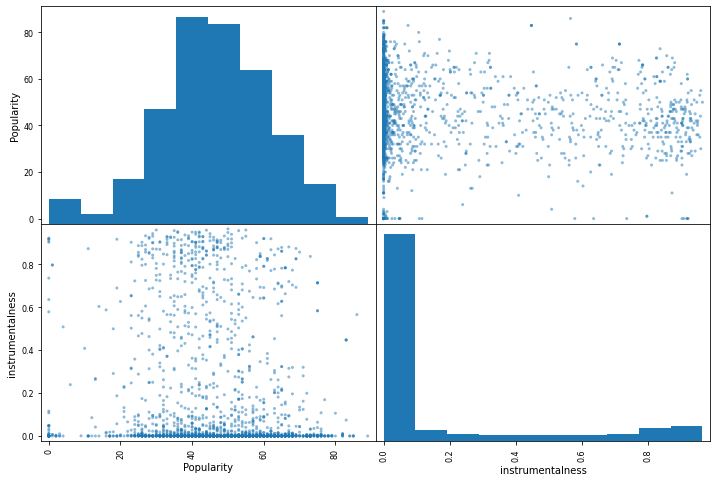

In [18]:
from pandas.plotting import scatter_matrix

attributes = ["Popularity", "instrumentalness"]
scatter_matrix(spotify[attributes], figsize=(12,8))

In [19]:
# encode categorical attributes
from sklearn.preprocessing import OrdinalEncoder
spotify_cat = spotify[["Genres"]]
ordinal_encoder = OrdinalEncoder()
spotify_cat_encoder = ordinal_encoder.fit_transform(spotify_cat)
spotify_cat_encoder[:10]

array([[ 526.],
       [1009.],
       [ 150.],
       [ 535.],
       [ 280.],
       [1134.],
       [  78.],
       [ 262.],
       [ 185.],
       [1110.]])

In [20]:
ordinal_encoder.categories_

[array(["['abstract beats', 'alternative hip hop', 'alternative r&b', 'chillhop', 'indie jazz', 'indie soul', 'synth funk', 'vapor twitch', 'wonky']",
        "['abstract idm', 'ambient', 'compositional ambient', 'drift', 'neo-classical']",
        "['acid rock', 'album rock', 'blues rock', 'classic canadian rock', 'classic rock', 'country rock', 'folk rock', 'hard rock', 'mellow gold', 'psychedelic rock', 'rock', 'roots rock']",
        ..., "['virginia indie']", "['western americana']", '[]'],
       dtype=object)]